In [3]:
import pandas as pd
from lxml import etree
import os
import re

In [4]:
import bokeh as bk

In [7]:
def get_genre_subtitles(target_genres, start_year):

    movie_subtitles = []

    genres = os.listdir('../Downloads/OpenSubtitles/nl/')

    for genre in genres:

        if ((re.match('[a-zA-Z]+', genre)) and (genre in (target_genres))):
            print(genre)

            years = os.listdir('../Downloads/OpenSubtitles/nl/' + genre)

            for year in years:

                if (re.match('[0-9]+', year)):
                    #print('ano')

                    if (int(year) > start_year):

                        movies = os.listdir('../Downloads/OpenSubtitles/nl/' + genre + '/' + year)

                        for movie in movies:
                            #print(movie)
                            if (re.match('[^.]', movie)):
                                #print('movie')

                                tree = etree.parse('../Downloads/OpenSubtitles/nl/' + genre + '/' + year + '/' + movie)

                                movie_subtitles.append((tree.xpath('//w/text()')))
    
    return movie_subtitles
      

In [8]:
comedy_subtitles = get_genre_subtitles(['Comedy'], 1990)
drama_subtitles = get_genre_subtitles(['Drama'], 1990)
romance_subtitles = get_genre_subtitles(['Romance'], 1990)

Comedy
Drama
Romance


In [9]:
from stop_words import get_stop_words

stop_words = get_stop_words('dutch')

my_stop_words = ['jij', 'we', 'wij', 'u', 'zij', 'jullie', 'jouw', 'jou', 'mijn', 'zijn', 'de', 'het']

stop_words.extend(my_stop_words)

In [10]:
taal_stemmed = []

for subtitle in drama_subtitles:
    for word in subtitle:
        if ((re.match('[a-zA-Z_]', word) is not None)):
            #taal_stemmed.append(stemmer.stem(word))
            taal_stemmed.append(word)

In [11]:
corpus = open('taal-corpus.txt', 'w')

for word in taal_stemmed:
    corpus.write("%s\n" % word)

In [15]:
df_words = pd.read_csv('taal-corpus.txt', sep='\n', names=['word'])

In [16]:
df_words.shape

In [118]:
df_words.head()

,word
0,De
1,gebroeders
2,Grimm
3,majesteit
4,Goedendag


In [ ]:
df_words_non_stop = pd.DataFrame([word for word in df_words.word if ((str(word).lower() not in stop_words) & (len(str(word)) > 3))], columns=['word'])

In [39]:
df_dist = pd.DataFrame(df_words_non_stop.word.value_counts(), columns=['word'])

In [41]:
df_dist = df_dist.reset_index().rename(columns={'index':'word', 'word':'how_many'})

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

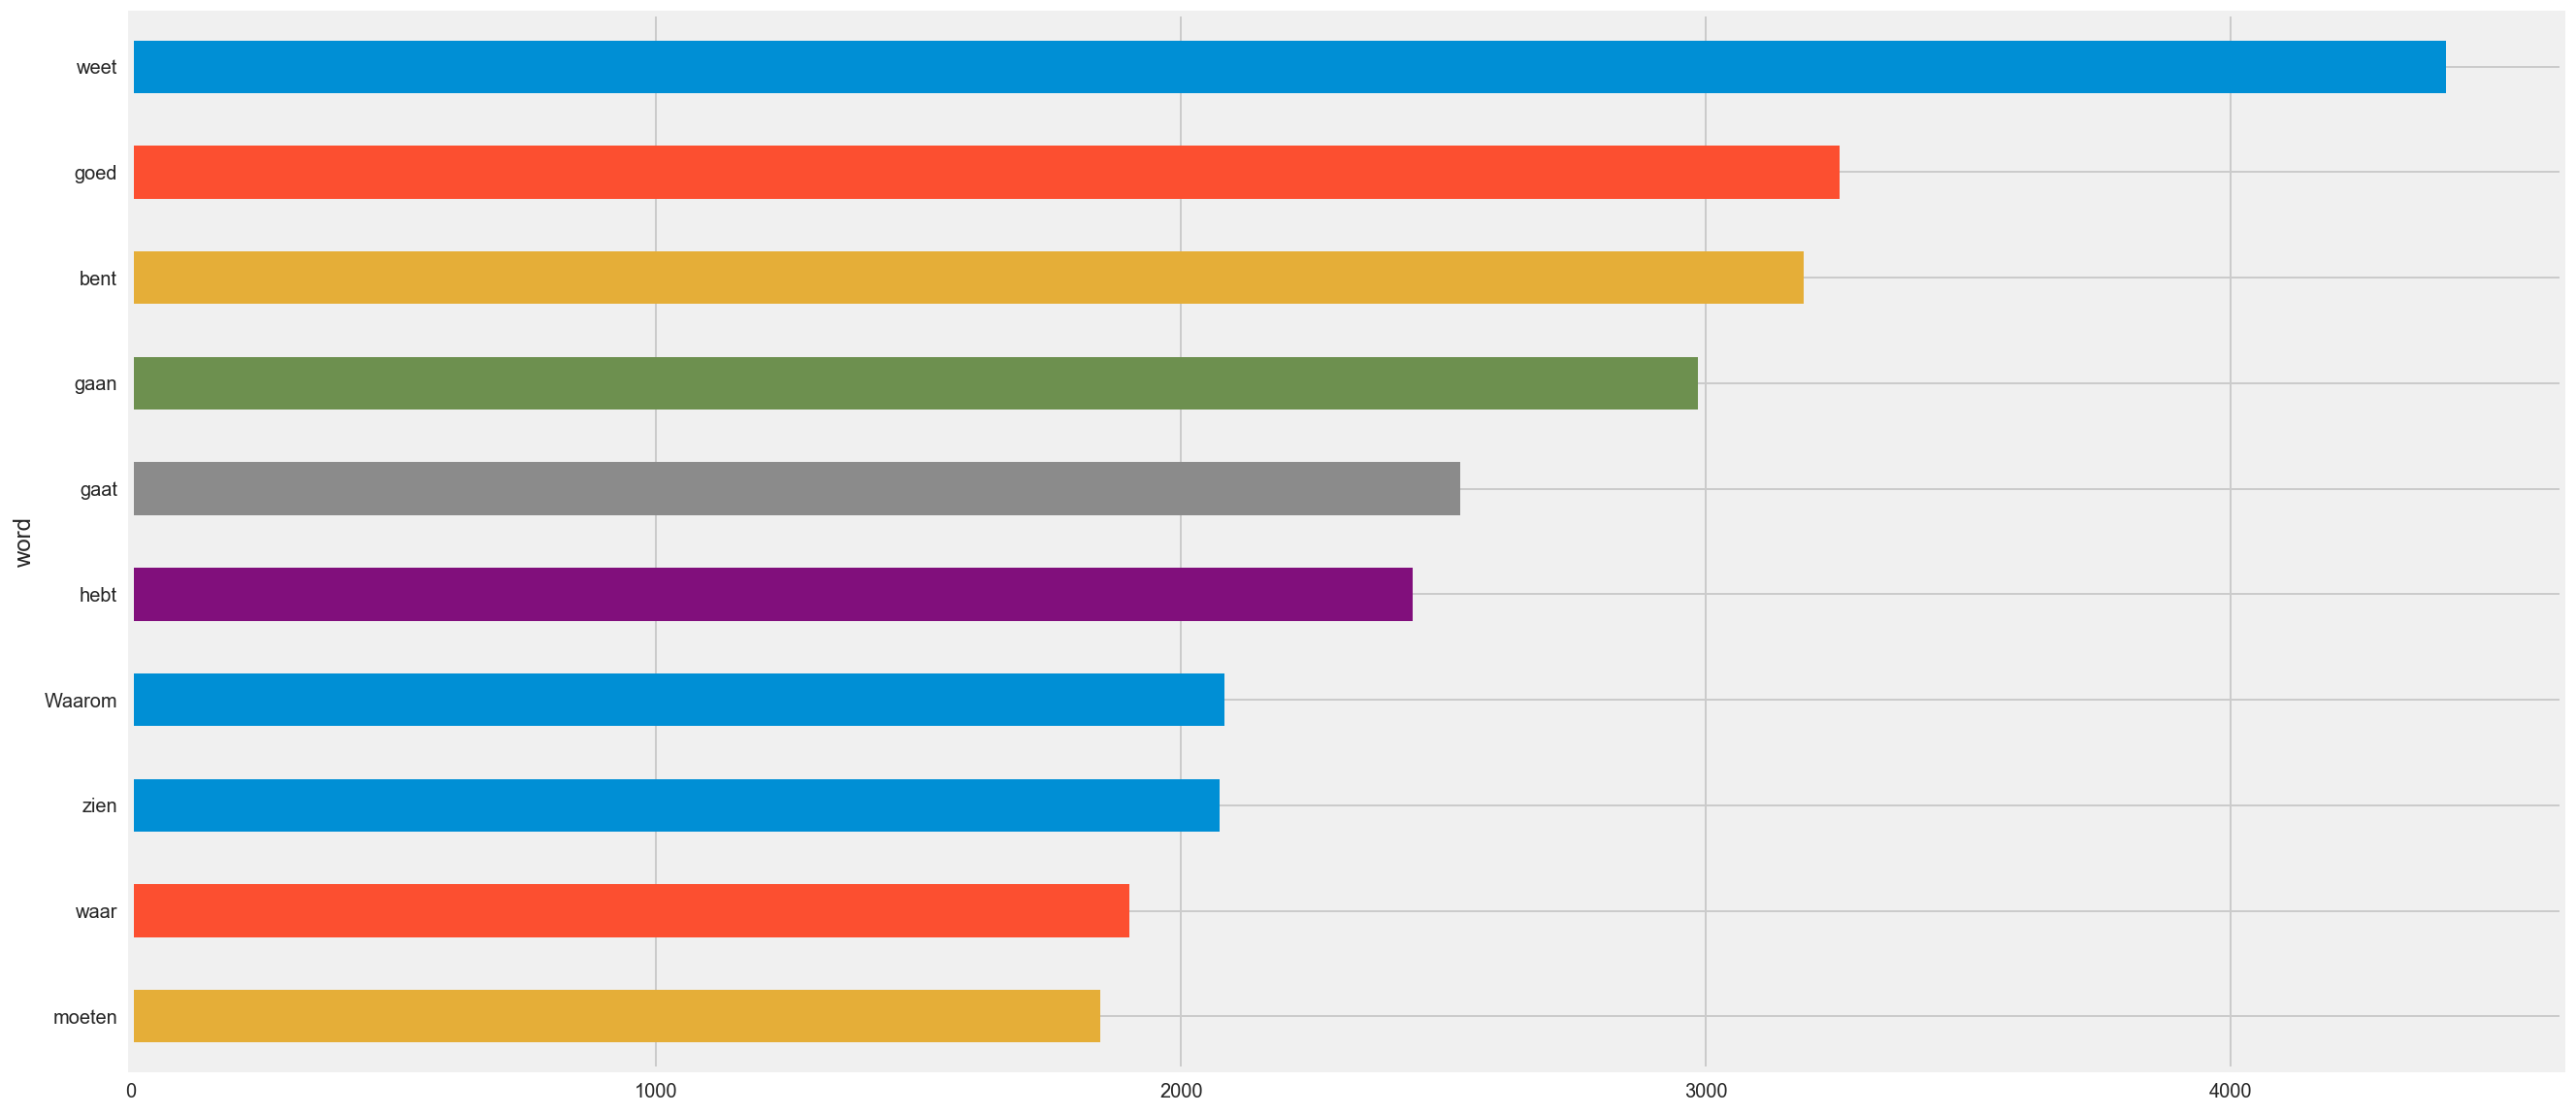

In [119]:
df_words_non_stop.groupby('word').size().sort_values(ascending=False).head(10).plot(kind='barh', fig=plt.figure(figsize=(20,10)))
plt.gca().invert_yaxis()